In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score,mean_squared_error,PredictionErrorDisplay
from sklearn.model_selection import StratifiedKFold,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [2]:
df = pd.read_csv('Crop_recommendation.csv')


df.shape

(2200, 8)

In [10]:
df_filter = df.drop(df[(df.label == 'blackgram') \
                       | (df.label == 'mungbean') \
                       | (df.label == 'lentil') \
                       | (df.label == 'pigeonpeas') \
                       | (df.label == 'coconut') \
                       | (df.label == 'kidneybeans') \
                       | (df.label == 'apple') \
                       | (df.label == 'muskmelon') \
                       | (df.label == 'watermelon') \
                       | (df.label == 'jute')].index)
df_filter = df_filter.drop(columns=['temperature','humidity','ph','rainfall'])
df_filter.head()

,N,P,K,label
0,90,42,43,rice
1,85,58,41,rice
2,60,55,44,rice
3,74,35,40,rice
4,78,42,42,rice


In [11]:
X = df_filter.drop(columns=['label'])
y = df_filter['label']

In [12]:
n_features = X.shape[1]
feature_names = X.columns

# Número de classes
classes = y.unique()

# Diferentes marcadores para cada classe
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'H', 'X', 'd', '|', '_', '+', 'x', '1', '2', '3', '4', '.', ',', 'P']

# Criar diretório para salvar as imagens (se necessário)
import os
output_dir = 'scatter_plots_bw'
os.makedirs(output_dir, exist_ok=True)

for i in range(n_features):
    for j in range(n_features):
        if i != j:
            plt.figure(figsize=(8, 6))
            for cls, marker in zip(classes, markers):
                plt.scatter(X[y == cls].iloc[:, i], X[y == cls].iloc[:, j], marker=marker, label=f'{cls}', color='black')
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{feature_names[i]} vs {feature_names[j]}')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            plt.grid(True)
            plt.savefig(os.path.join(output_dir, f'scatter_{feature_names[i]}_vs_{feature_names[j]}.png'), format='png', dpi=300, bbox_inches='tight')
            plt.close()

In [13]:
clf = DecisionTreeClassifier()
kf = StratifiedKFold(n_splits=10, shuffle=True)

In [14]:
accuracies = []

for fold, (train_index, test_index) in enumerate(kf.split(X, y)): 
    clf.fit(X.iloc[train_index], y.iloc[train_index])
    pred = clf.predict(X.iloc[test_index])
    accuracy = accuracy_score(y.iloc[test_index], pred)
    accuracies.append(accuracy)
    print(f'Acurácia no fold {fold + 1}: {accuracy:.4f}')

# Calcular a média das acurácias
mean_accuracy = np.mean(accuracies)
print(f'Média da acurácia nos folds: {mean_accuracy:.4f}')

Acurácia no fold 1: 1.0000
Acurácia no fold 2: 0.9917
Acurácia no fold 3: 0.9583
Acurácia no fold 4: 0.9917
Acurácia no fold 5: 0.9667
Acurácia no fold 6: 0.9917
Acurácia no fold 7: 0.9917
Acurácia no fold 8: 0.9917
Acurácia no fold 9: 0.9917
Acurácia no fold 10: 1.0000
Média da acurácia nos folds: 0.9875


[Text(0.818359375, 0.9545454545454546, 'K <= 65.0\ngini = 0.917\nsamples = 1080\nvalue = [90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90]'),
 Text(0.69921875, 0.8636363636363636, 'P <= 69.5\ngini = 0.9\nsamples = 900\nvalue = [90, 0, 90, 90, 0, 90, 90, 90, 90, 90, 90, 90]'),
 Text(0.5546875, 0.7727272727272727, 'K <= 35.5\ngini = 0.889\nsamples = 808\nvalue = [0, 0, 90, 90, 0, 90, 90, 90, 90, 88, 90, 90]'),
 Text(0.359375, 0.6818181818181818, 'N <= 50.0\ngini = 0.839\nsamples = 550\nvalue = [0, 0, 90, 90, 0, 90, 90, 90, 90, 0, 5, 5]'),
 Text(0.140625, 0.5909090909090909, 'K <= 15.5\ngini = 0.678\nsamples = 275\nvalue = [0, 0, 0, 0, 0, 0, 90, 90, 90, 0, 5, 0]'),
 Text(0.0625, 0.5, 'P <= 35.5\ngini = 0.117\nsamples = 96\nvalue = [0, 0, 0, 0, 0, 0, 0, 6, 90, 0, 0, 0]'),
 Text(0.03125, 0.4090909090909091, 'gini = 0.0\nsamples = 90\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 90, 0, 0, 0]'),
 Text(0.09375, 0.4090909090909091, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0]'),
 T

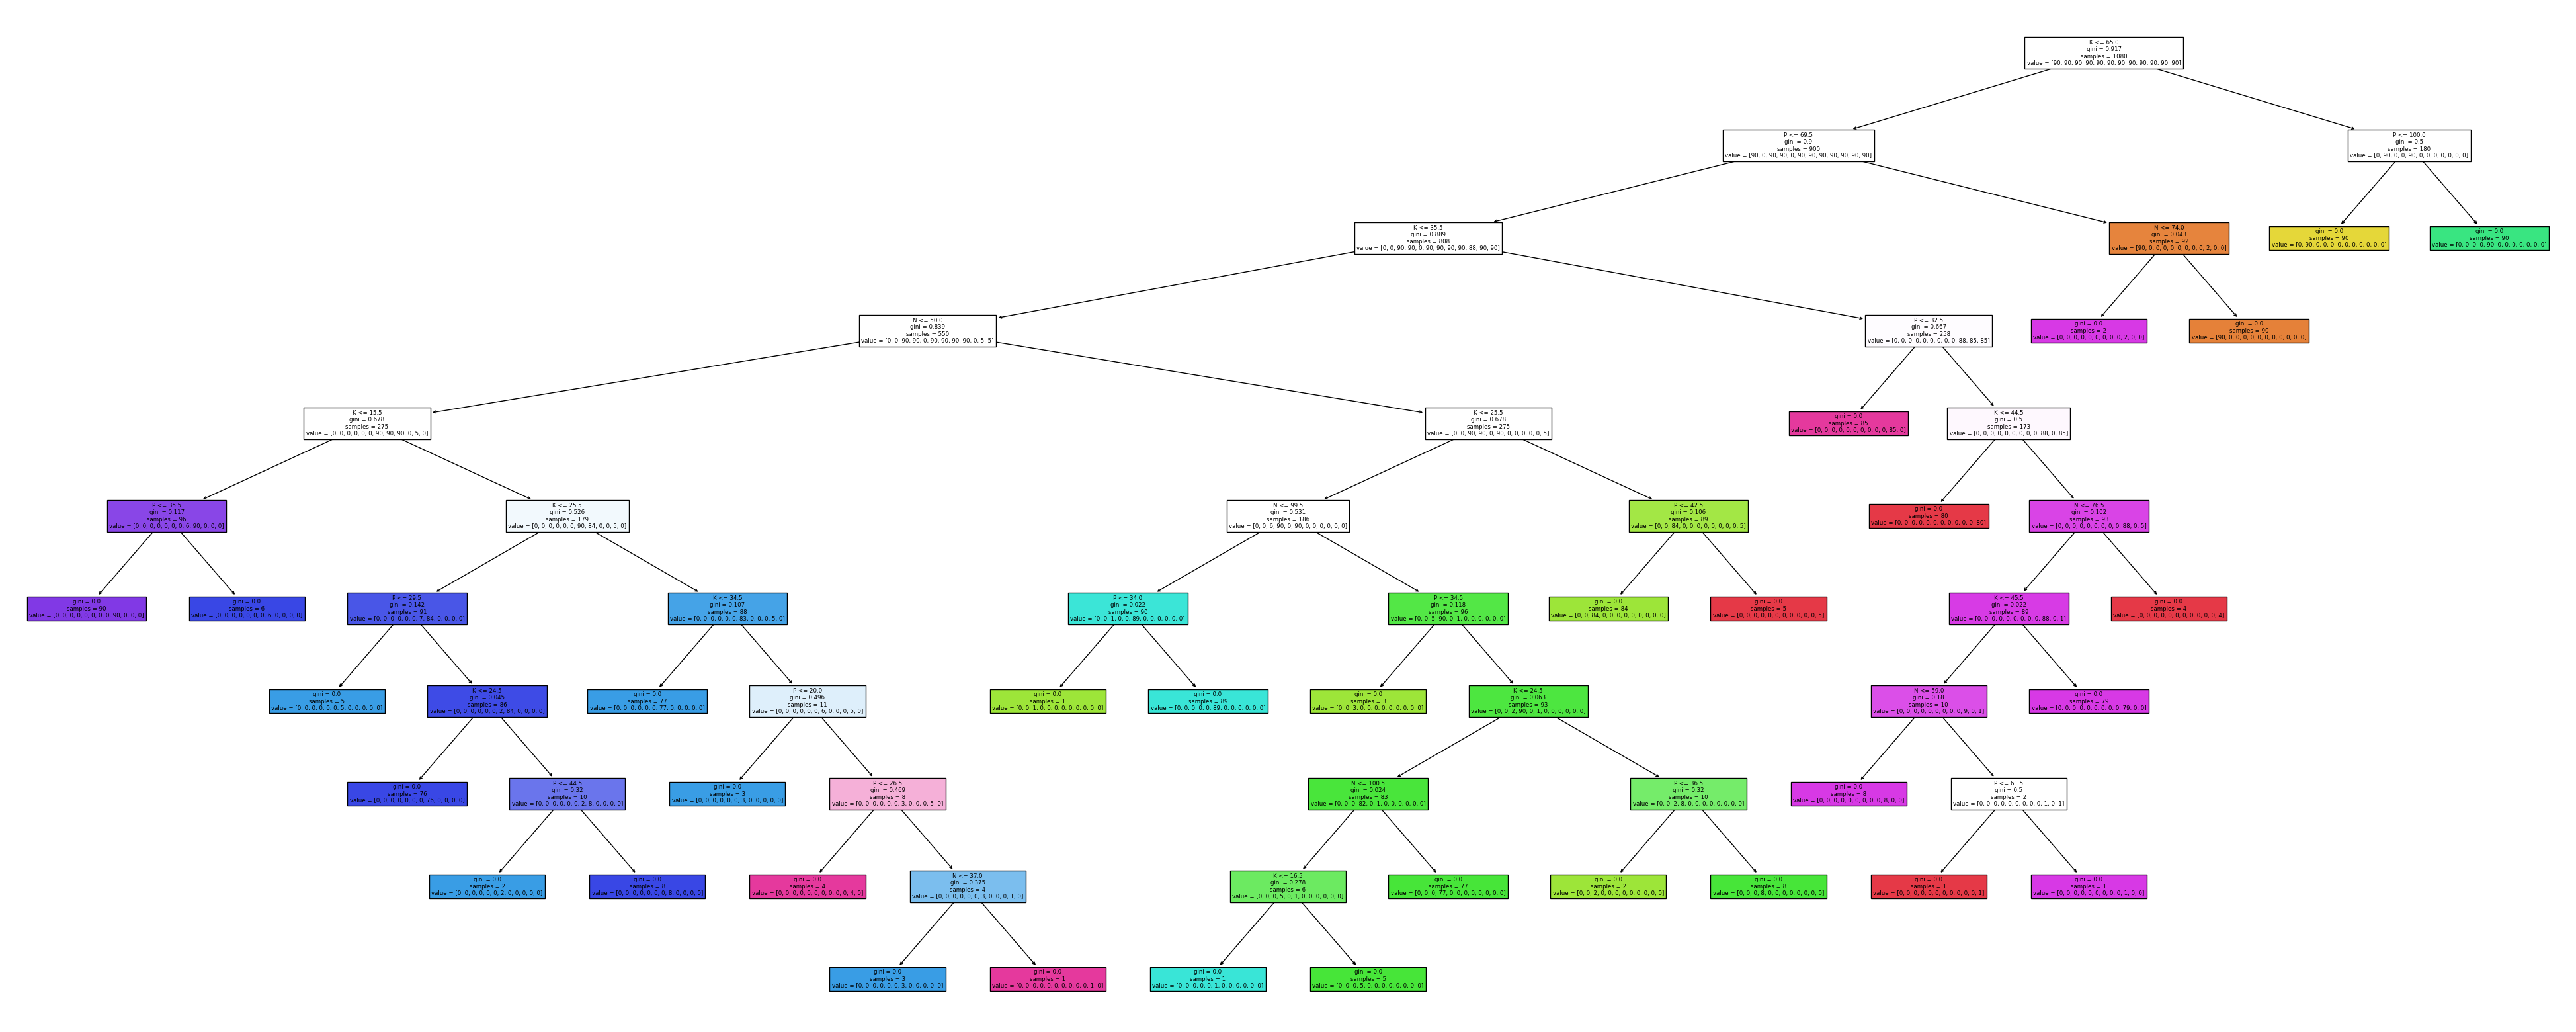

In [15]:
fig = plt.figure(figsize=(50,20))
tree.plot_tree(clf, 
               feature_names=df.columns,
               filled=True)

Acurácia no fold 1: 0.9833
Acurácia no fold 2: 0.9833
Acurácia no fold 3: 0.9917
Acurácia no fold 4: 1.0000
Acurácia no fold 5: 1.0000
Acurácia no fold 6: 0.9917
Acurácia no fold 7: 1.0000
Acurácia no fold 8: 0.9917
Acurácia no fold 9: 0.9917
Acurácia no fold 10: 0.9833
Média da acurácia nos folds: 0.9917


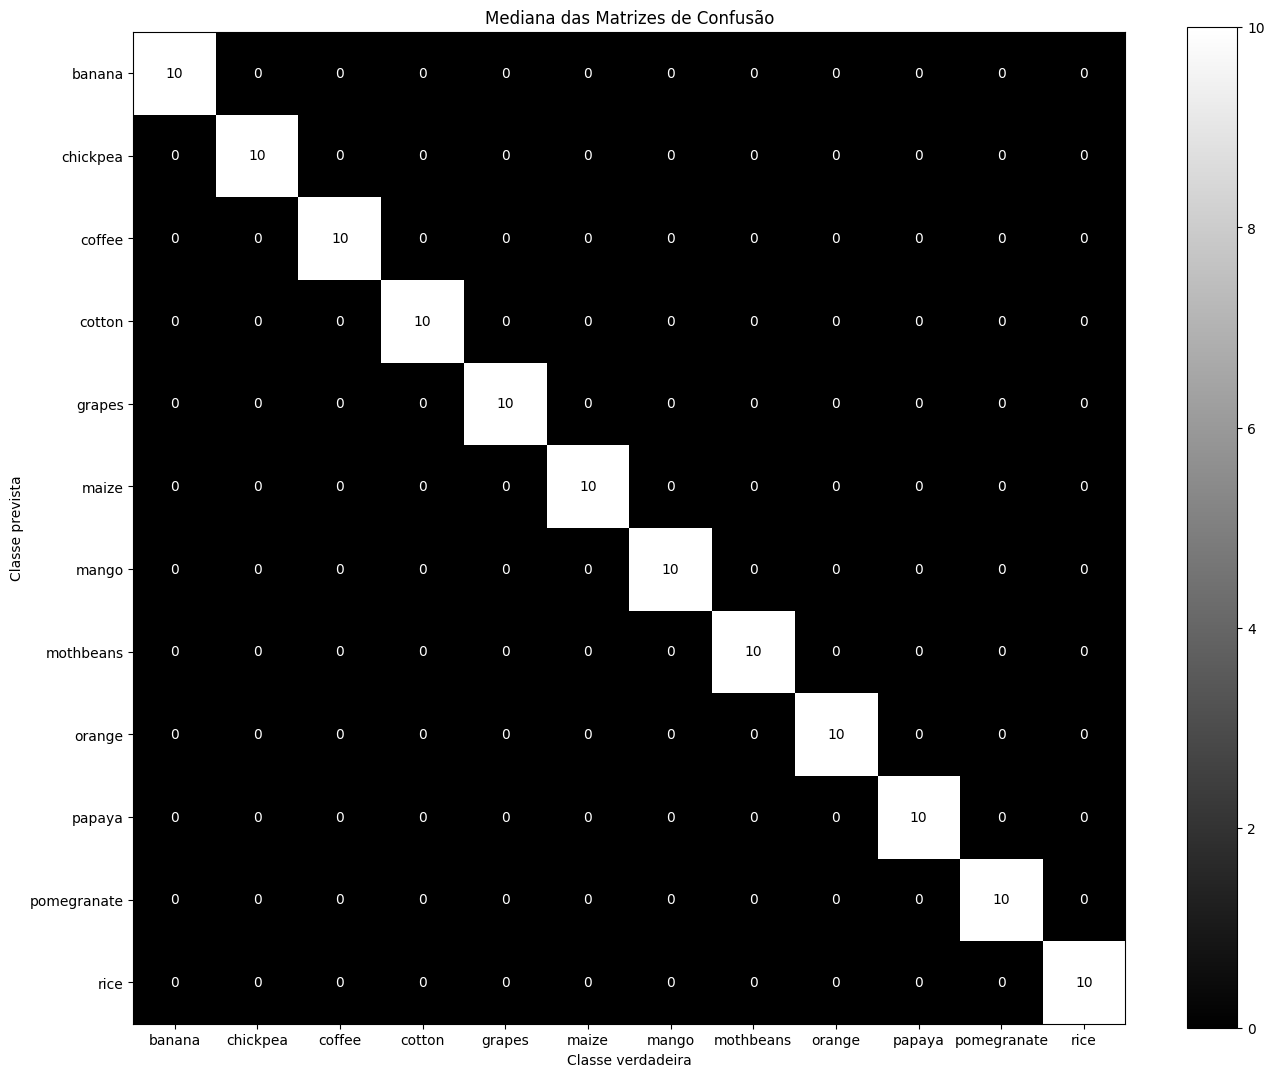

In [16]:
accuracies = []
confusion_matrices = []  # Definindo a lista para armazenar as matrizes de confusão

for fold, (train_index, test_index) in enumerate(kf.split(X, y)): 
    clf.fit(X.iloc[train_index], y.iloc[train_index])
    pred = clf.predict(X.iloc[test_index])
    accuracy = accuracy_score(y.iloc[test_index], pred)
    accuracies.append(accuracy)
    print(f'Acurácia no fold {fold + 1}: {accuracy:.4f}')

    cm = confusion_matrix(y.iloc[test_index], pred)
    confusion_matrices.append(cm)


# Calcular a média das acurácias
mean_accuracy = np.mean(accuracies)
print(f'Média da acurácia nos folds: {mean_accuracy:.4f}')

# Calcular a mediana da matriz de confusão
confusion_matrices = np.array(confusion_matrices)
median_confusion_matrix = np.median(confusion_matrices, axis=0)

# Exibir a mediana da matriz de confusão
fig, ax = plt.subplots(figsize=(16, 13))
cmd = ConfusionMatrixDisplay(median_confusion_matrix, display_labels=clf.classes_)
cmd.plot(ax=ax, cmap='gray')
plt.title('Mediana das Matrizes de Confusão')
plt.xlabel('Classe verdadeira')
plt.ylabel('Classe prevista')
plt.show()

# Tree regression

In [57]:
obj_columns = df.select_dtypes(['object']).columns
df_filter[obj_columns] = df_filter[obj_columns].apply(lambda x: pd.factorize(x)[0])
df_filter.describe()


X = df_filter.to_numpy()
y = df_filter.drop(columns = ['label']).to_numpy()
df_filter.head()

,N,P,K,label
0,90,42,43,0
1,85,58,41,0
2,60,55,44,0
3,74,35,40,0
4,78,42,42,0


In [58]:
clf = DecisionTreeRegressor()
kf = StratifiedKFold(n_splits=10, shuffle=True)

In [59]:
for fold, (train, test) in enumerate(kf.split(X, y.argmax(1))): 
    clf.fit(X[train], y[train])    
    y_pred = clf.predict(X[test])
